In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
proteins_seq=pd.read_csv("./Data/pdb_data_seq.csv")

In [4]:
proteins_data = pd.read_csv("./Data/pdb_data_no_dups.csv")

In [5]:
proteins_data.drop_duplicates(inplace=True)
proteins_seq.drop_duplicates(inplace=True)

## Dataset

This notebook aims to extract more information from the dataset with protein sequences. These sequences provide more valuable informaitons in terms of protein functions than the chemical properties on their own.

The amino acid content of the polipeptyde is what actually causes the different chemical properties that can be later identified using different methods. But more importantly, the sequences may contain specific motifs - typical, widespread sequences, often connected to certain biological function. 

Because of that, the analysis of this dataset can be even more informative. On the other hand working with long sequences of irregular length can be challanging, and would require some additional processing. First, the focus is directed towards:
- the amino acid content of the polypeptide,
- the frequency of certain elements in the sequence.

Since the sequence dataset contained only protein ID's, it is joined as it with the protein properties dataset to get protein funciton from there.

In [6]:
proteins_data

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.60,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.80,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0


In [7]:
proteins_seq

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
...,...,...,...,...,...
467299,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein
467300,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467301,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467302,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein


Sekwencje

In [8]:
proteins = proteins_seq[proteins_seq["macromoleculeType"]=="Protein"].reset_index()
proteins

,index,structureId,chainId,sequence,residueCount,macromoleculeType
0,4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
1,7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
2,8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
3,11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
4,12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
...,...,...,...,...,...,...
345175,467299,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein
345176,467300,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
345177,467301,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
345178,467302,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein


In [9]:
proteins = proteins[proteins['sequence'].notna()].copy()

proteins["len"] = proteins["sequence"].apply(lambda x: len(x))

In this step, sequence information is expanded with the following data:
- singular chain length (amibiguous with residueCount),
- number of the chains present in the protein.


In the next step, the proteinogenic amino acids, including Selenocysteine and Pyrrolysine, are listed. The following assumption is made: **the natural sequences must consist of proteinogenic amino acids.** Additional symbols are used: B, Z, J and X where:
- B, Z and J are used to encode 2 possible aminoacids in the same position (Asparagine / aspartic acid, Glutamic acid / glutamine, Leucine / isoleucine)
- X stands for the unknown sequence.

Next the analysis checks if it is possible to differentiate cetrain protein functions based on amino acid content. This approach has the advantage of being much simpler than more complex analysis of sequence.

In [10]:
aminoacids = ["A","C","D","E","F","G","H","I","K","L","M","N","O","P","Q","R","S","T","U","V","W","Y","X","B","Z","J"]
aminoacids_df = pd.DataFrame(np.nan, index=range(len(proteins)), columns=aminoacids)
aminoacids_df
df = pd.concat([proteins.reset_index(), aminoacids_df], axis=1)

In [11]:
proteins_with_functions = df.merge(proteins_data[["classification","structureId"]].reset_index(), how="left", on="structureId")

In [12]:
proteins_with_functions

,level_0,index_x,structureId,chainId,sequence,residueCount,macromoleculeType,len,A,C,...,U,V,W,Y,X,B,Z,J,index_y,classification
0,0,4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,OXYGEN TRANSPORT
1,1,7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,165,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,HYDROLASE(O-GLYCOSYL)
2,2,8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,OXYGEN TRANSPORT
3,3,11,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,167,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,HYDROLASE(O-GLYCOSYL)
4,4,12,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,OXYGEN TRANSPORT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346317,345175,467299,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein,388,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141399,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)
346318,345176,467300,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141400,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)
346319,345177,467301,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141400,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)
346320,345178,467302,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141400,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)


In [13]:
proteins_chains = proteins_with_functions[["structureId","chainId"]].groupby("structureId").agg("count").reset_index()
proteins_chains = proteins_chains.rename(columns={"chainId":"chainCount"})

In [14]:
proteins_with_functions = proteins_with_functions.merge(proteins_chains, on="structureId")

In [15]:
proteins_with_functions.drop(columns=["level_0","index_x","index_y"],inplace=True)

In [16]:
proteins_with_functions

,structureId,chainId,sequence,residueCount,macromoleculeType,len,A,C,D,E,...,U,V,W,Y,X,B,Z,J,classification,chainCount
0,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OXYGEN TRANSPORT,1
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,165,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLASE(O-GLYCOSYL),1
2,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OXYGEN TRANSPORT,1
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,167,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLASE(O-GLYCOSYL),1
4,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OXYGEN TRANSPORT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346317,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein,388,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),1
346318,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),4
346319,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),4
346320,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),4


In [17]:
proteins_with_functions["classification"].value_counts()

classification
HYDROLASE                            46336
TRANSFERASE                          36424
OXIDOREDUCTASE                       34321
IMMUNE SYSTEM                        15615
LYASE                                11682
                                     ...  
STRUCTURAL PROTEIN, CELL CYCLE           1
KINASE (GLYCOGEN METABOLISM)             1
SURFACE GLYCOPROTEIN                     1
IMMUNE SYSTEM,HYDROLASE INHIBITOR        1
antimicrobial                            1
Name: count, Length: 4468, dtype: int64

The steps above proved that the number of categories used to divide the proteins are redundant and too extensive. This led to the reduction of said categories. Some of these come from various errors and spelling inconsistencies within the dataset (varying cases, hyphens, etc.).

First step was the standarization of the spelling in all categories by converting words to uppercase. Additionally, detailed descriptions provided in brackets or after a slash were removed. This alone reduced the number of categories, but further refinement was still necessary.

In [18]:
proteins_with_functions["classification"] = proteins_with_functions["classification"].str.upper()

In [19]:
proteins_with_functions["classification"] = proteins_with_functions["classification"].apply(lambda x: str(x).split("/")[0])
proteins_with_functions["classification"] = proteins_with_functions["classification"].apply(lambda x: str(x).split(",")[0].strip())
proteins_with_functions["classification"] = proteins_with_functions["classification"].apply(lambda x: str(x).split("(")[0].strip())

In [20]:
proteins_with_functions["classification"].value_counts()

classification
HYDROLASE                              65096
TRANSFERASE                            44110
OXIDOREDUCTASE                         38342
IMMUNE SYSTEM                          17082
LYASE                                  13114
                                       ...  
KUNITZ INHIBITOR                           1
IGG BINDING PROTEIN                        1
HUMAN SERUM ALBUMIN BINDING PROTEIN        1
TRANSPORT PROTEIN REGULATOR                1
CELLULASE DEGRADATION                      1
Name: count, Length: 1396, dtype: int64

The next step involved merging categories into more general ones: all types of regulatory proteins, binding proteins, and transport proteins were grouped into three categories, which significantly reduced their total number. Finally, two additional categories were created for inhibitors and receptors.

In [21]:
regulation = list(filter(lambda x : re.search(r"REGULAT",x) ,proteins_with_functions["classification"].value_counts().index.to_list()))
regulation

['GENE REGULATION',
 'TRANSCRIPTION REGULATOR',
 'TRANSCRIPTION REGULATION',
 'HYDROLASE REGULATOR',
 'TRANSCRIPTIONAL REGULATOR',
 'TRANSFERASE REGULATOR',
 'REGULATOR OF COMPLEMENT PATHWAY',
 'REGULATORY PROTEIN',
 'GENE REGULATING PROTEIN',
 'DNA BINDING REGULATORY PROTEIN',
 'REPLICATION REGULATOR',
 'RESPONSE REGULATOR',
 'APOPTOSIS REGULATOR',
 'TRANSLATION REGULATOR',
 'HORMONE REGULATOR COMPLEX',
 'DNA-BINDING REGULATORY PROTEIN',
 'REGULATOR',
 'TRANSCRIPTIONAL REGULATION',
 'TRANSCRIPTION REGULATION COMPLEX',
 'CHROMATIN REGULATOR',
 'CELL CYCLE REGULATORY PROTEIN',
 'COMPLEMENT REGULATOR',
 'PROTEIN FIBRIL REGULATOR',
 'CYTOKINE REGULATOR',
 'CELL REGULATOR PROTEIN',
 'GENE-REGULATING PROTEIN',
 'STRUCTURAL REGULATION PROTEIN',
 'COMPLEMENT REGULATORY PROTEIN',
 'METAL TRANSPORT REGULATOR',
 'CELL SHAPE REGULATION',
 'SIGNALING REGULATOR',
 'TRANSCRIPTIONAL REGULATORY PROTEIN',
 'TRANSCRIPTION  REGULATOR',
 'EUKARYOTIC TRANSCRIPTIONAL REGULATION',
 'TRANSLATION REGULATION',


In [22]:
proteins_with_functions["classification"] = proteins_with_functions["classification"].replace(regulation, "REGULATORY PROTEIN")

In [23]:
binding = list(filter(lambda x : re.search(r"BINDING",x) ,proteins_with_functions["classification"].value_counts().index.to_list()))
binding

['PROTEIN BINDING',
 'SUGAR BINDING PROTEIN',
 'DNA BINDING PROTEIN',
 'METAL BINDING PROTEIN',
 'RNA BINDING PROTEIN',
 'LIPID BINDING PROTEIN',
 'PEPTIDE BINDING PROTEIN',
 'BIOTIN-BINDING PROTEIN',
 'ACETYLCHOLINE-BINDING PROTEIN',
 'CALCIUM-BINDING PROTEIN',
 'BIOTIN BINDING PROTEIN',
 'LIGAND BINDING PROTEIN',
 'OXYGEN BINDING',
 'CALCIUM BINDING PROTEIN',
 'ACETYLCHOLINE BINDING PROTEIN',
 'BINDING PROTEIN',
 'CHOLINE-BINDING PROTEIN',
 'CARBOHYDRATE BINDING PROTEIN',
 'CARBOHYDRATE-BINDING PROTEIN',
 'ACTIN-BINDING PROTEIN',
 'SOLUTE-BINDING PROTEIN',
 'HEME BINDING PROTEIN',
 'GTP-BINDING PROTEIN',
 'HEME-BINDING PROTEIN',
 'PENICILLIN-BINDING PROTEIN',
 'RIM-BINDING PROTEIN',
 'HORMONE BINDING PROTEIN',
 'NUCLEOTIDE BINDING PROTEIN',
 'ATP-BINDING PROTEIN',
 'ATP BINDING PROTEIN',
 'IRON-BINDING PROTEIN',
 'DNA-BINDING',
 'CARBOHYDRATE-BINDING MODULE',
 'IRON BINDING PROTEIN',
 'PHEROMONE BINDING PROTEIN',
 'PERIPLASMIC BINDING PROTEIN',
 'GTP BINDING PROTEIN',
 'ODORANT BINDI

In [24]:
proteins_with_functions["classification"] = proteins_with_functions["classification"].replace(binding, "BINDING PROTEIN")

In [25]:
transport = list(filter(lambda x : re.search(r"TRANSPORT",x) ,proteins_with_functions["classification"].value_counts().index.to_list()))

In [26]:
transport

['TRANSPORT PROTEIN',
 'ELECTRON TRANSPORT',
 'PROTEIN TRANSPORT',
 'METAL TRANSPORT',
 'OXYGEN TRANSPORT',
 'LIPID TRANSPORT',
 'TRANSPORT',
 'PROTON TRANSPORT',
 'NUCLEAR TRANSPORT',
 'ION TRANSPORT',
 'ELECTRON TRANSPORT PROTEIN',
 'MEMBRANE TRANSPORT',
 'IRON TRANSPORT',
 'RETINOL TRANSPORT',
 'IRON STORAGE AND ELECTRON TRANSPORT',
 'METAL TRANSPORT INHIBITOR',
 'PHOSPHATE TRANSPORT',
 'IRON TRANSPORT PROTEIN',
 'RETINOIC-ACID TRANSPORT',
 'HYDROGEN ION TRANSPORT',
 'SUGAR TRANSPORT',
 'TRANSPORT PROTEIN INHIBITOR',
 'NITRIC OXIDE TRANSPORT',
 'ELECTRON TRANSPORT PROTEINS',
 'TRANSPORT PROTEIN RECEPTOR',
 'TRANSPORT RECEPTOR',
 'CELLULAR LIPOPHILIC TRANSPORT PROTEIN',
 'ELECTRON TRANSPORT-OXIDOREDUCTASE',
 'AMINO ACID TRANSPORT',
 'OXYGEN TRANSPORT PROTEIN',
 'RETINOIC ACID TRANSPORT',
 'NUCLEAR TRANSPORT PROTEIN COMPLEX',
 'ANION TRANSPORT',
 'MITOCHONDRIAL ELECTRON TRANSPORT',
 'LIGAND TRANSPORT',
 'PEPTIDE TRANSPORT',
 'HEME PROTEIN OF ELECTRON TRANSPORT',
 'INTRACELLULAR LIPID 

In [27]:
proteins_with_functions["classification"] = proteins_with_functions["classification"].replace(transport, "TRANSPORT PROTEIN")

In [28]:
inhibitor = list(filter(lambda x : re.search(r"INHIBITOR",x) ,proteins_with_functions["classification"].value_counts().index.to_list()))

In [29]:
proteins_with_functions["classification"] = proteins_with_functions["classification"].replace(inhibitor, "INHIBITOR")

In [30]:
receptor = list(filter(lambda x : re.search(r"RECEPTOR",x) ,proteins_with_functions["classification"].value_counts().index.to_list()))
proteins_with_functions["classification"] = proteins_with_functions["classification"].replace(inhibitor, "RECEPTOR")

In [31]:
proteins_with_functions["classification"].value_counts()

classification
HYDROLASE                  65096
TRANSFERASE                44110
OXIDOREDUCTASE             38342
BINDING PROTEIN            23692
TRANSPORT PROTEIN          19411
                           ...  
CONNECTIN                      1
PANCREATIC RIBONUCLEASE        1
THREE-HELIX BUNDLE             1
FATTY ACID METABOLISM          1
EXCITATORY NEUROTOXIN          1
Name: count, Length: 965, dtype: int64

In [32]:
temp = proteins_with_functions["classification"].value_counts()
other = temp[temp < 1000].index.tolist()

In [ ]:
proteins_with_functions["classification"] = proteins_with_functions["classification"].replace(other, "OTHER")

Initially, categories with count lower than 1000 instances were replaced with the 'Other' label. 

However, this group was too heterogeneous, containing data from many different and unrelated proteins. Since it constituted only a small fraction of the dataset, that could provide lots of noise, it was ultimately removed.

In [34]:
print(len(proteins_with_functions[proteins_with_functions["classification"]!="OTHER"]))
print(len(proteins_with_functions))

328579
346322


In [35]:
proteins_with_functions=proteins_with_functions[proteins_with_functions["classification"]!="OTHER"]

In [36]:
proteins_with_functions["classification"].value_counts()

classification
HYDROLASE               65096
TRANSFERASE             44110
OXIDOREDUCTASE          38342
BINDING PROTEIN         23692
TRANSPORT PROTEIN       19411
IMMUNE SYSTEM           17082
LYASE                   13114
VIRAL PROTEIN           10837
TRANSCRIPTION           10014
SIGNALING PROTEIN        7949
VIRUS                    7441
ISOMERASE                7430
LIGASE                   6167
MEMBRANE PROTEIN         5934
STRUCTURAL GENOMICS      5592
STRUCTURAL PROTEIN       4771
CHAPERONE                4761
CELL ADHESION            3436
REGULATORY PROTEIN       3187
PHOTOSYNTHESIS           3186
TOXIN                    3020
UNKNOWN FUNCTION         2868
CELL CYCLE               2814
HORMONE                  2445
DE NOVO PROTEIN          1818
RECEPTOR                 1716
APOPTOSIS                1682
MOTOR PROTEIN            1350
CONTRACTILE PROTEIN      1275
CYTOKINE                 1246
PROTEIN FIBRIL           1222
COMPLEX                  1151
BIOSYNTHETIC PROTEIN     

Next, some of the categories are dropped such as "UNKNOWN FUNCTION", "DE NOVO PROTEIN", "COMPLEX", since they don't bring any value to the analysis.

In [37]:
proteins_with_functions= proteins_with_functions[(proteins_with_functions["classification"]!="UNKNOWN FUNCTION") & 
                                                (proteins_with_functions["classification"]!="DE NOVO PROTEIN") &
                                                (proteins_with_functions["classification"]!="COMPLEX")]

In [38]:
proteins_with_functions

,structureId,chainId,sequence,residueCount,macromoleculeType,len,A,C,D,E,...,U,V,W,Y,X,B,Z,J,classification,chainCount
0,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRANSPORT PROTEIN,1
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,165,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLASE,1
2,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRANSPORT PROTEIN,1
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,167,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLASE,1
4,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRANSPORT PROTEIN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346317,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein,388,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE,1
346318,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE,4
346319,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE,4
346320,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISOMERASE,4


Once the categories are ready, the dataset is filled with the information about nucleotide content in the sequences. To achieve that, the occurences of amino acids in the sequence are counted and devided by the length to obtain the fraction of the sequence that consists of the particular amino acid.

In [39]:
proteins_with_functions.columns

Index(['structureId', 'chainId', 'sequence', 'residueCount',
       'macromoleculeType', 'len', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
       'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'X',
       'B', 'Z', 'J', 'classification', 'chainCount'],
      dtype='object')

In [40]:
proteins_with_functions = proteins_with_functions[proteins_with_functions['sequence'].notna()].copy()

proteins_with_functions["len"] = proteins_with_functions["sequence"].apply(lambda x: len(x))

for column in proteins_with_functions.columns[6:-2]:
    proteins_with_functions[column] = proteins_with_functions['sequence'].apply(lambda x: len(re.findall(column, x))/len(x))

In [41]:
proteins_with_functions

,structureId,chainId,sequence,residueCount,macromoleculeType,len,A,C,D,E,...,U,V,W,Y,X,B,Z,J,classification,chainCount
0,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,0.110390,0.000000,0.038961,0.090909,...,0.0,0.058442,0.012987,0.019481,0.0,0.0,0.0,0.0,TRANSPORT PROTEIN,1
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein,165,0.103030,0.000000,0.060606,0.048485,...,0.0,0.054545,0.018182,0.036364,0.0,0.0,0.0,0.0,HYDROLASE,1
2,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,0.116883,0.000000,0.038961,0.090909,...,0.0,0.051948,0.012987,0.019481,0.0,0.0,0.0,0.0,TRANSPORT PROTEIN,1
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein,167,0.095808,0.000000,0.065868,0.047904,...,0.0,0.053892,0.017964,0.035928,0.0,0.0,0.0,0.0,HYDROLASE,1
4,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein,154,0.116883,0.000000,0.038961,0.090909,...,0.0,0.051948,0.012987,0.019481,0.0,0.0,0.0,0.0,TRANSPORT PROTEIN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346317,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein,388,0.121134,0.002577,0.095361,0.072165,...,0.0,0.048969,0.015464,0.023196,0.0,0.0,0.0,0.0,ISOMERASE,1
346318,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,0.117048,0.000000,0.083969,0.066158,...,0.0,0.050891,0.012723,0.030534,0.0,0.0,0.0,0.0,ISOMERASE,4
346319,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,0.117048,0.000000,0.083969,0.066158,...,0.0,0.050891,0.012723,0.030534,0.0,0.0,0.0,0.0,ISOMERASE,4
346320,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein,393,0.117048,0.000000,0.083969,0.066158,...,0.0,0.050891,0.012723,0.030534,0.0,0.0,0.0,0.0,ISOMERASE,4


In [42]:
proteins_with_functions_cleaned = proteins_with_functions[proteins_with_functions.columns[:2]].copy()
for column in proteins_with_functions.columns[2:]:
    if len(proteins_with_functions[column].value_counts()) != 1:
        proteins_with_functions_cleaned[column] = proteins_with_functions[column]

In [456]:
proteins_with_functions_cleaned.columns

Index(['structureId', 'chainId', 'sequence', 'residueCount', 'len', 'A', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'Y', 'X', 'B', 'Z', 'classification',
       'chainCount'],
      dtype='object')

In [ ]:
# proteins_with_functions_cleaned[["structureId","classification"]].drop_duplicates().to_csv("./Data/protein_classification.csv")

## EDA

The distribution of values in the dataset is visualised using plots which prove that the data is not normally distributed and is mainly positively skewed. Some of the plots show significant amount of instances with the 0 value, while at the same time there are instances with much higher values than the median in the dataset. 

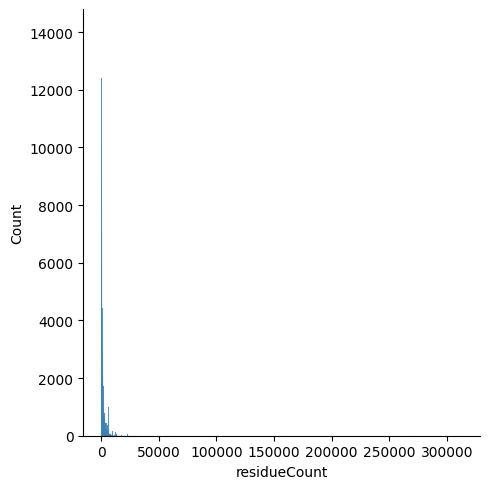

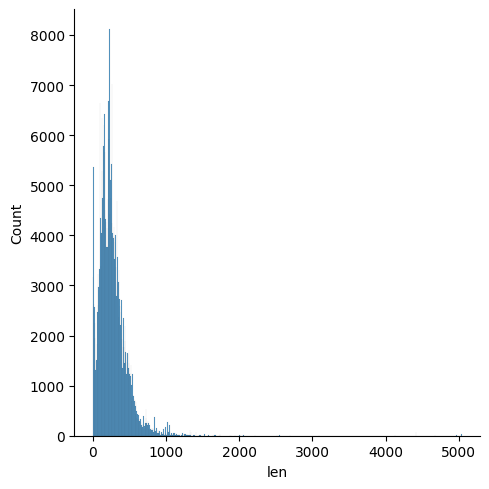

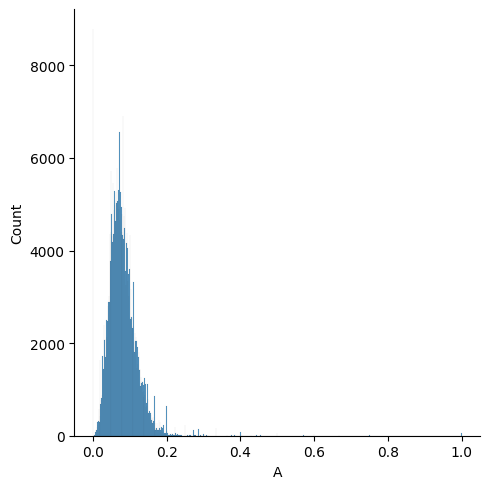

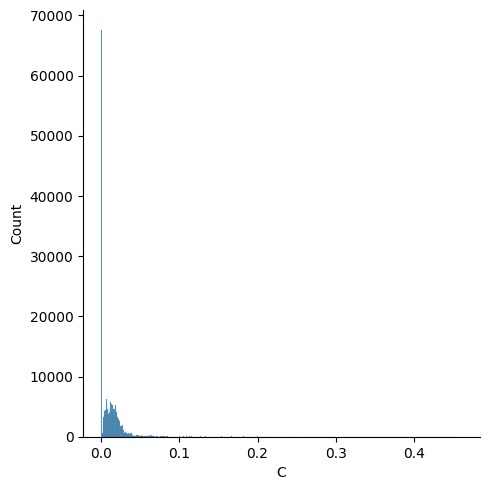

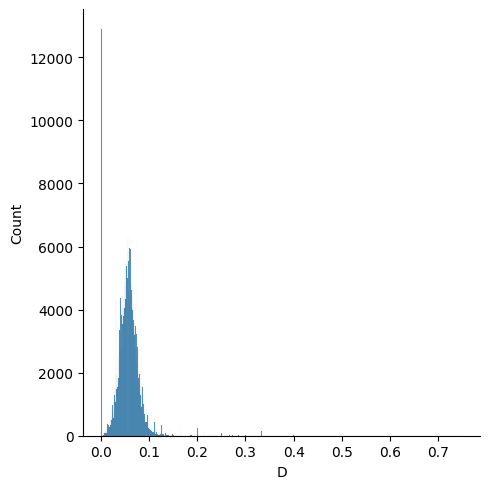

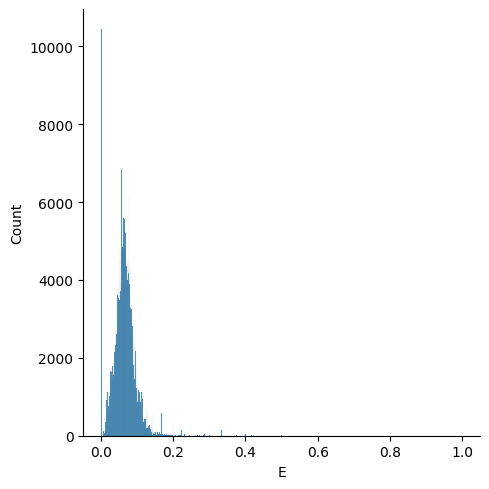

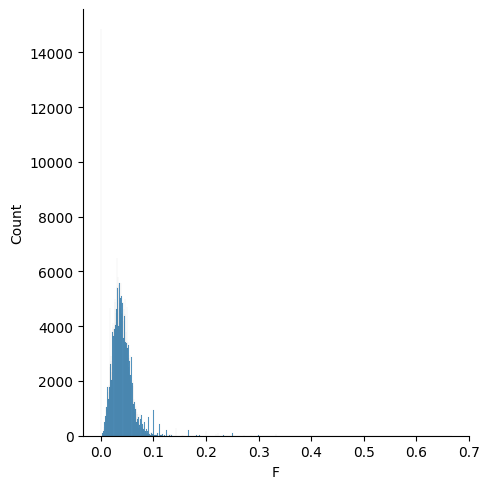

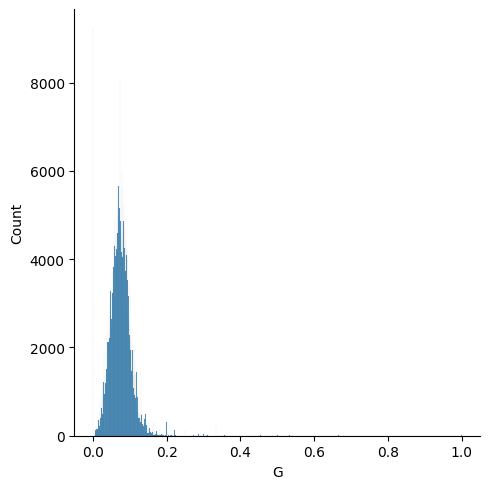

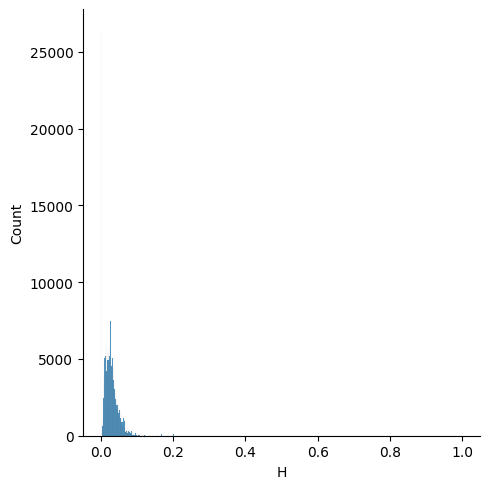

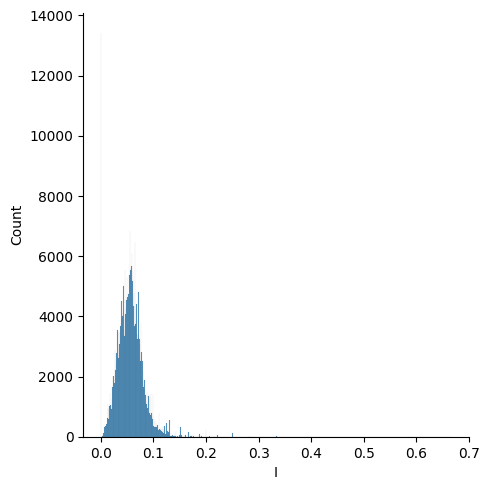

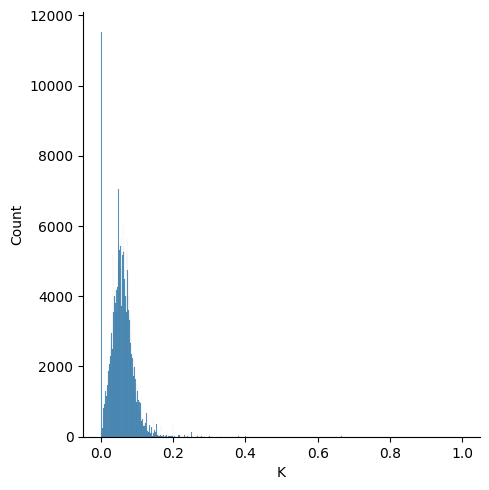

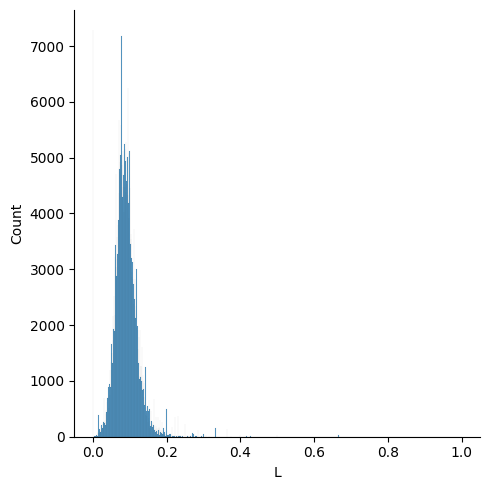

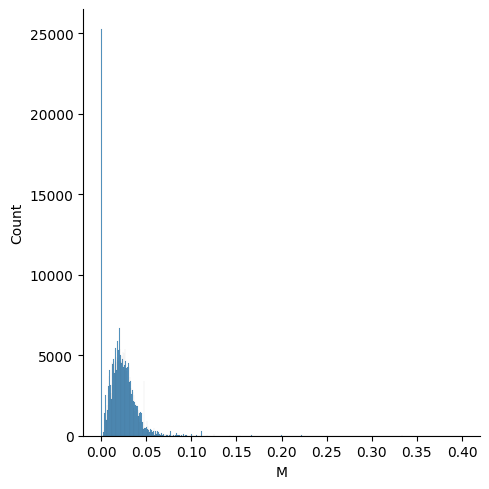

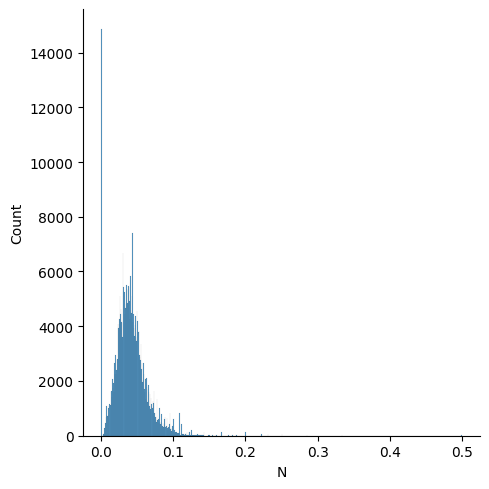

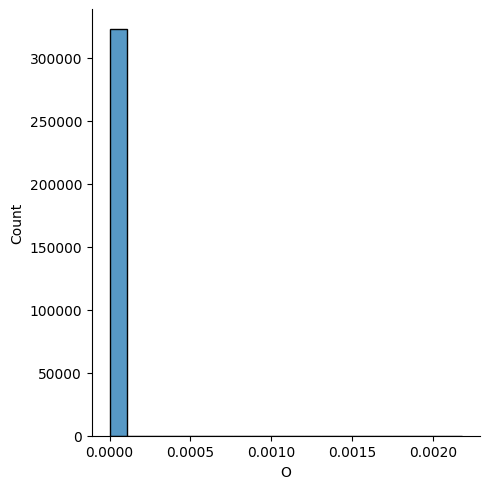

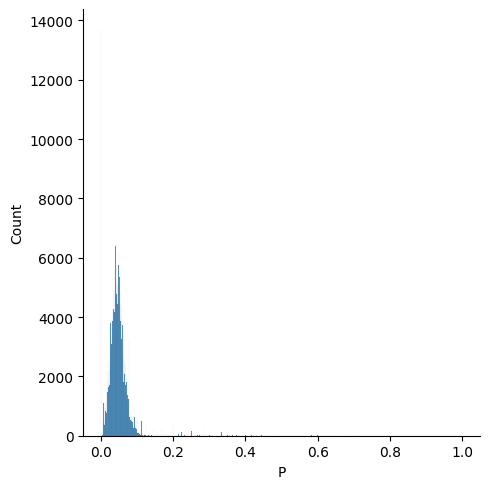

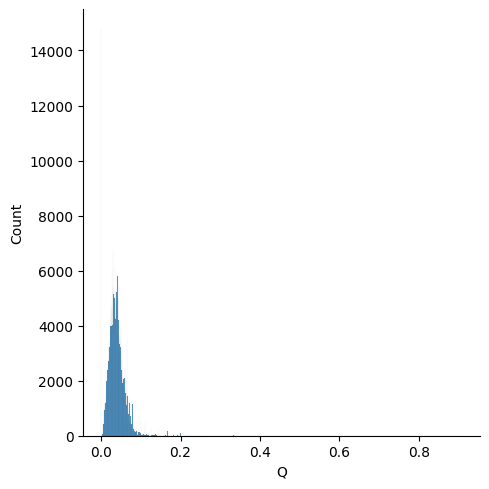

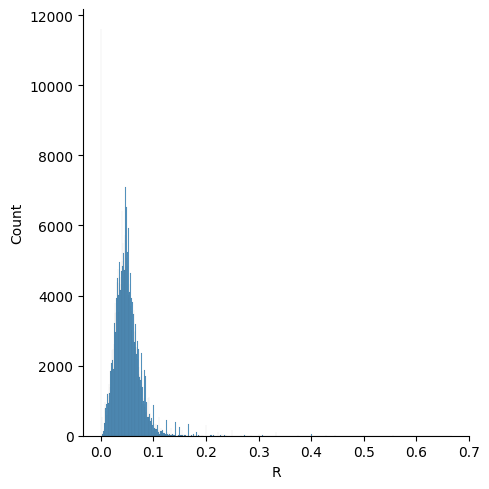

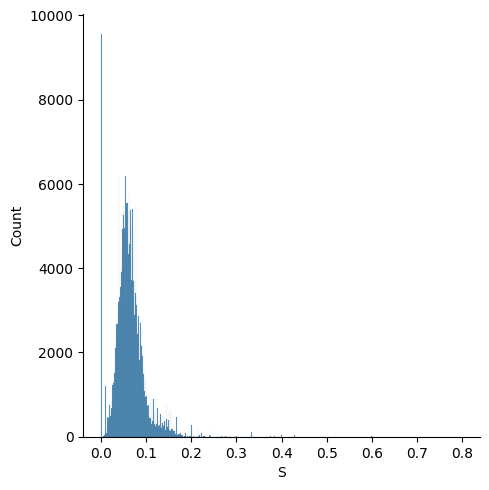

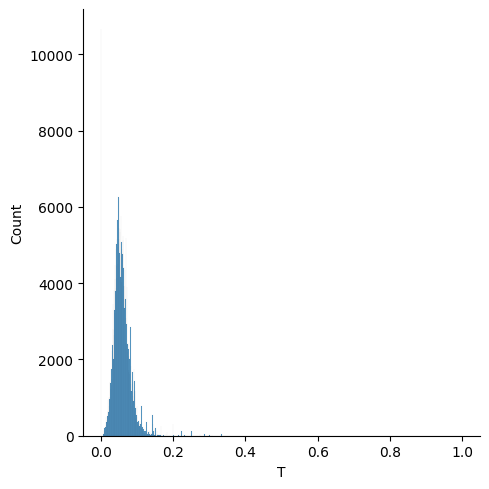

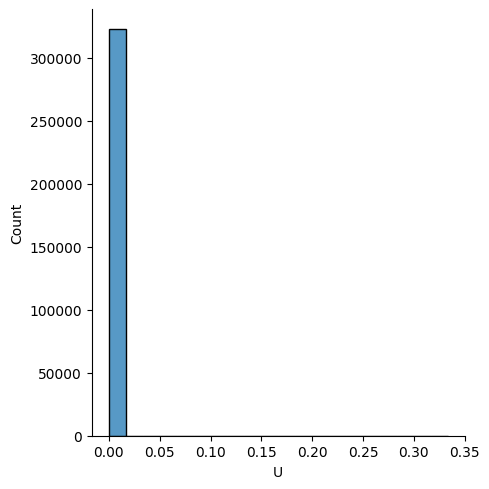

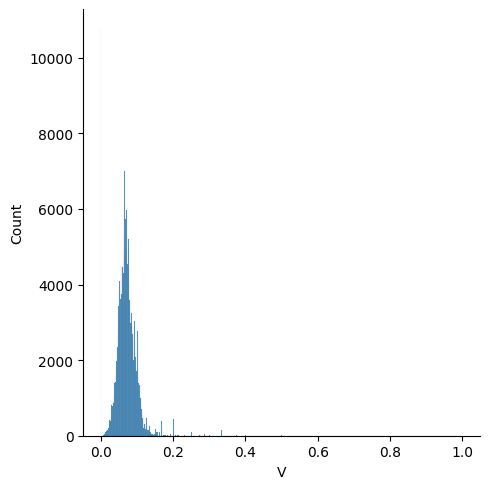

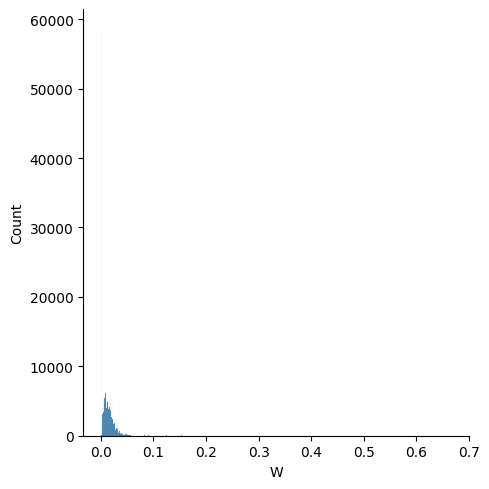

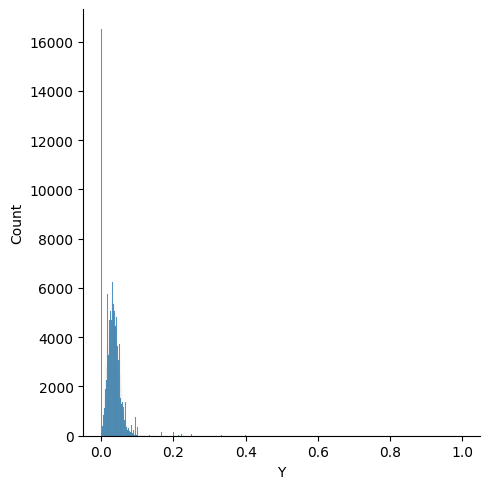

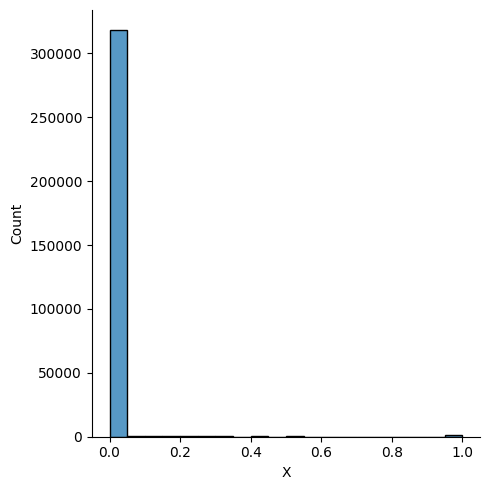

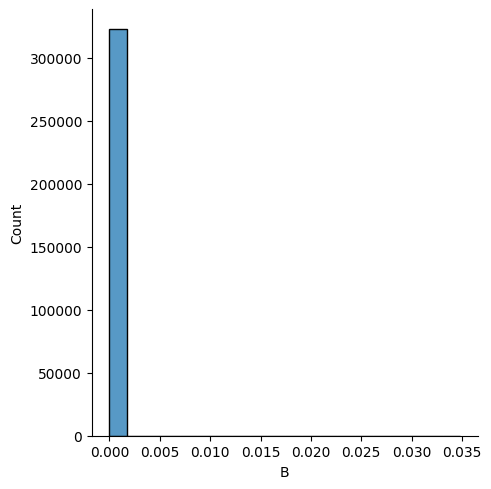

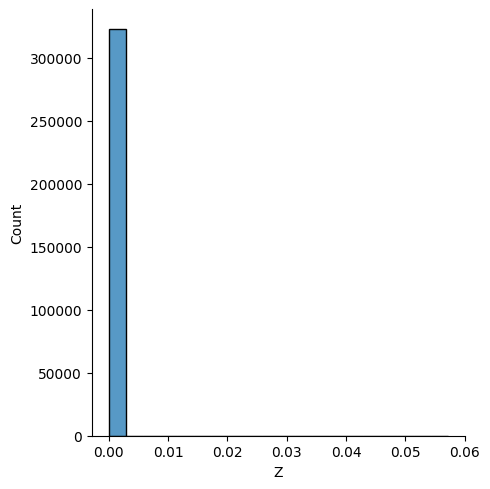

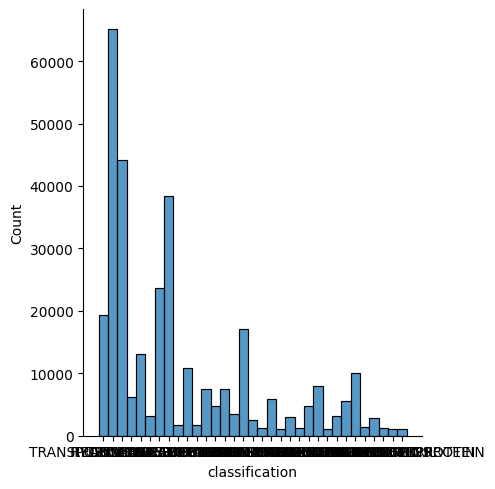

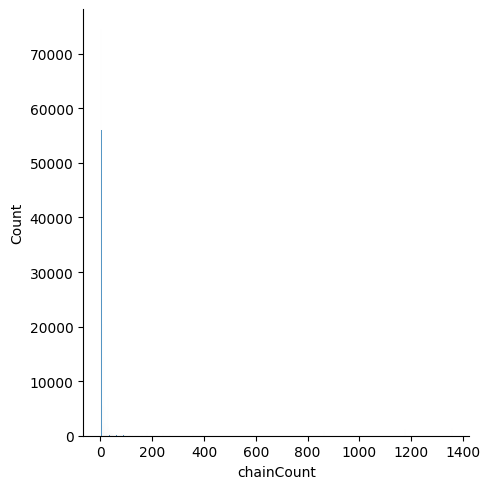

In [457]:
for column in proteins_with_functions_cleaned.iloc[:,3:].columns:
    sns.displot(proteins_with_functions, x=column)

In [458]:
matplotlib.pyplot.close()

After analysing the charts, another analysis is conducted to determine if the values differ between groups. That is, whether proteins with different functions were characterized by distinct properties such as length or amino acid content. 

To check this hypothesis and answer the question above, Kruskal–Wallis tests are performed, since the data did not follow a normal distribution.

In [459]:
from scipy.stats import kruskal

def kruskal_test(df, group_by):

    grouped = df.groupby(group_by)

    for column in df.columns:
        groups = [np.array(group[column]) for _, group in grouped]
        h, p = kruskal(*groups)
        if p < 0.05 and column!=group_by:
            print(f"{column}: p-value = {p}")
        # print(f"{column}: H = {h}")


In [461]:
proteins_with_functions_cleaned.columns

Index(['structureId', 'chainId', 'sequence', 'residueCount', 'len', 'A', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'Y', 'X', 'B', 'Z', 'classification',
       'chainCount'],
      dtype='object')

In [462]:
kruskal_test(proteins_with_functions_cleaned.iloc[:,3:],"classification")

residueCount: p-value = 0.0
len: p-value = 0.0
A: p-value = 0.0
C: p-value = 0.0
D: p-value = 0.0
E: p-value = 0.0
F: p-value = 0.0
G: p-value = 0.0
H: p-value = 0.0
I: p-value = 0.0
K: p-value = 0.0
L: p-value = 0.0
M: p-value = 0.0
N: p-value = 0.0
P: p-value = 0.0
Q: p-value = 0.0
R: p-value = 0.0
S: p-value = 0.0
T: p-value = 0.0
U: p-value = 3.784138121554006e-33
V: p-value = 0.0
W: p-value = 0.0
Y: p-value = 0.0
X: p-value = 0.0
Z: p-value = 0.039932439753343096
chainCount: p-value = 0.0


The results of Kruskall-Willis tests indicate that all features except of "B" differ among groups - that at least one group is characterized by significantly different mean value than others. This indicates that it will be possible to distinguish different proteins based on their amino acid content and other properties of the sequence.

This is a good sign for further Machine Learning.

In [465]:
mean_in_group = proteins_with_functions_cleaned.iloc[:,3:].groupby("classification").aggregate("mean").reset_index()
mean_in_group.sort_values("A")

,classification,residueCount,len,A,C,D,E,F,G,H,...,S,T,U,V,W,Y,X,B,Z,chainCount
9,HORMONE,361.984049,79.060532,0.036538,0.086565,0.021826,0.073850,0.044451,0.069908,0.036557,...,0.068965,0.052268,3.178430e-05,0.068485,0.006170,0.062595,0.002744,0.000000e+00,0.000000e+00,7.286299
8,FLUORESCENT PROTEIN,1176.617062,239.944076,0.049437,0.011779,0.066477,0.068022,0.048658,0.096434,0.048945,...,0.046001,0.063585,1.137441e-05,0.064034,0.008368,0.044250,0.000192,0.000000e+00,0.000000e+00,5.199052
26,TOXIN,1278.881457,207.646358,0.060913,0.046119,0.056788,0.054684,0.034163,0.068366,0.023198,...,0.073202,0.065383,1.655629e-04,0.055553,0.016296,0.044123,0.002182,0.000000e+00,0.000000e+00,5.991391
11,IMMUNE SYSTEM,1215.857628,187.613453,0.061162,0.022103,0.047900,0.054729,0.038975,0.070089,0.023854,...,0.098292,0.072719,0.000000e+00,0.069097,0.021101,0.044305,0.002077,0.000000e+00,0.000000e+00,6.649807
27,TRANSCRIPTION,1124.889055,186.641302,0.063885,0.014825,0.054645,0.073916,0.035269,0.052725,0.035479,...,0.071397,0.047985,0.000000e+00,0.054945,0.009469,0.028945,0.004010,0.000000e+00,0.000000e+00,5.297783
31,VIRAL PROTEIN,3583.081941,250.699640,0.064397,0.018041,0.050670,0.059295,0.035169,0.075367,0.022649,...,0.075800,0.069062,0.000000e+00,0.064964,0.017029,0.034996,0.006860,0.000000e+00,0.000000e+00,12.914183
7,CYTOKINE,2209.768860,141.004815,0.065604,0.038933,0.043978,0.058325,0.038004,0.054817,0.024770,...,0.083377,0.059538,0.000000e+00,0.062589,0.012234,0.033281,0.000361,0.000000e+00,0.000000e+00,18.000000
4,CELL CYCLE,1860.571784,245.025942,0.066990,0.016330,0.056534,0.082684,0.036778,0.055393,0.026524,...,0.066502,0.052393,0.000000e+00,0.060350,0.010155,0.030508,0.005479,0.000000e+00,0.000000e+00,6.810235
23,SIGNALING PROTEIN,1073.999623,214.763115,0.067322,0.017558,0.057639,0.072922,0.039660,0.064244,0.027485,...,0.069091,0.052739,8.838387e-07,0.064800,0.012364,0.033638,0.003788,6.691595e-07,0.000000e+00,5.162788
29,TRANSLATION,1271.745614,271.499123,0.068637,0.011810,0.057652,0.077845,0.038199,0.067273,0.026012,...,0.056895,0.052370,0.000000e+00,0.073048,0.011584,0.029859,0.004084,0.000000e+00,0.000000e+00,5.273684


<Axes: >

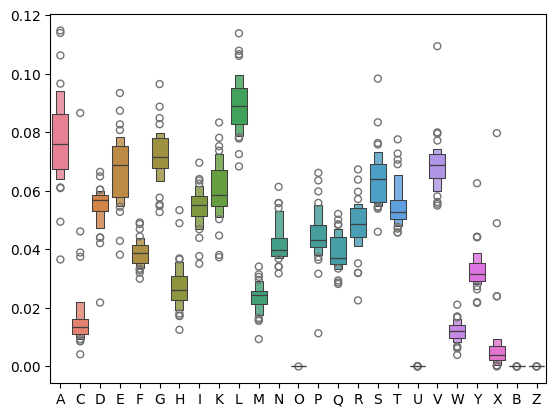

In [468]:
sns.boxenplot(mean_in_group.iloc[:,3:-1])

Both the table and plot show that the sequences' characteristics vary among proteins with different functions.

In [481]:
proteins_with_functions_cleaned.reset_index().drop(columns="index",inplace=True)

In [484]:
# proteins_with_functions_cleaned.to_csv("./Data/joined_tables.csv", index=False)

In [485]:
# pd.read_csv("./Data/joined_tables.csv")